In [1]:
import pandas as pd
import pm4py

In [2]:
dataframe = pd.read_csv('EventLog_ACME_TeachingCase.csv', sep=';')
dataframe = pm4py.format_dataframe(dataframe, case_id='CASE_ID', activity_key='ACTIVITY', timestamp_key='TIMESTAMP')
event_log = pm4py.convert_to_event_log(dataframe)

In [3]:
event_log

[{'attributes': {'concept:name': 'Case10'}, 'events': [{'CASE_ID': 'Case10', 'ACTIVITY': 'Creation', 'TIMESTAMP': Timestamp('2018-01-02 13:39:47+0000', tz='UTC'), 'REPAIR_IN_TIME_5D': 0, 'DEVICETYPE': 'AB52', 'SERVICEPOINT': 'E', 'concept:name': 'Creation', 'time:timestamp': Timestamp('2018-01-02 13:39:47+0000', tz='UTC'), '@@index': 0, '@@case_index': 0}, '..', {'CASE_ID': 'Case10', 'ACTIVITY': 'Completed', 'TIMESTAMP': Timestamp('2018-01-17 09:34:32+0000', tz='UTC'), 'REPAIR_IN_TIME_5D': 0, 'DEVICETYPE': 'AB52', 'SERVICEPOINT': 'E', 'concept:name': 'Completed', 'time:timestamp': Timestamp('2018-01-17 09:34:32+0000', tz='UTC'), '@@index': 6, '@@case_index': 0}]}, '....', {'attributes': {'concept:name': 'Case29258'}, 'events': [{'CASE_ID': 'Case29258', 'ACTIVITY': 'Creation', 'TIMESTAMP': Timestamp('2019-02-19 14:18:45+0000', tz='UTC'), 'REPAIR_IN_TIME_5D': 0, 'DEVICETYPE': 'AB37', 'SERVICEPOINT': 'E', 'concept:name': 'Creation', 'time:timestamp': Timestamp('2019-02-19 14:18:45+0000', 

List all traces

In [5]:
trace_list = list(event_log)
# trace_list = list(filter(lambda t: len(t) > 10, event_log))
#trace_list

In [6]:
total_traces = len(event_log)
total_traces

13275

Find traces with the most activities

In [7]:
largest_trace_length = max(len(trace) for trace in event_log)
print("Largest trace length:", largest_trace_length)

Largest trace length: 13


Discover start and end activities

In [10]:
from pm4py.statistics.start_activities.log.get import get_start_activities
from pm4py.statistics.end_activities.log.get import get_end_activities

log_start = get_start_activities(event_log)
end_activities = get_end_activities(event_log)
log_start

{'Creation': 12069,
 'Letter': 1041,
 'InDelivery': 13,
 'NoteHotline': 39,
 'StockEntry': 18,
 'DeviceReceived': 92,
 'Completed': 1,
 'Approved': 1,
 'NoteWorkshop': 1}

In [11]:
end_activities

{'Completed': 11815,
 'NoteHotline': 414,
 'InDelivery': 177,
 'NoteWorkshop': 763,
 'StockEntry': 18,
 'Letter': 68,
 'Approved': 8,
 'Transmission': 4,
 'DeviceReceived': 4,
 'StatusRequest': 4}

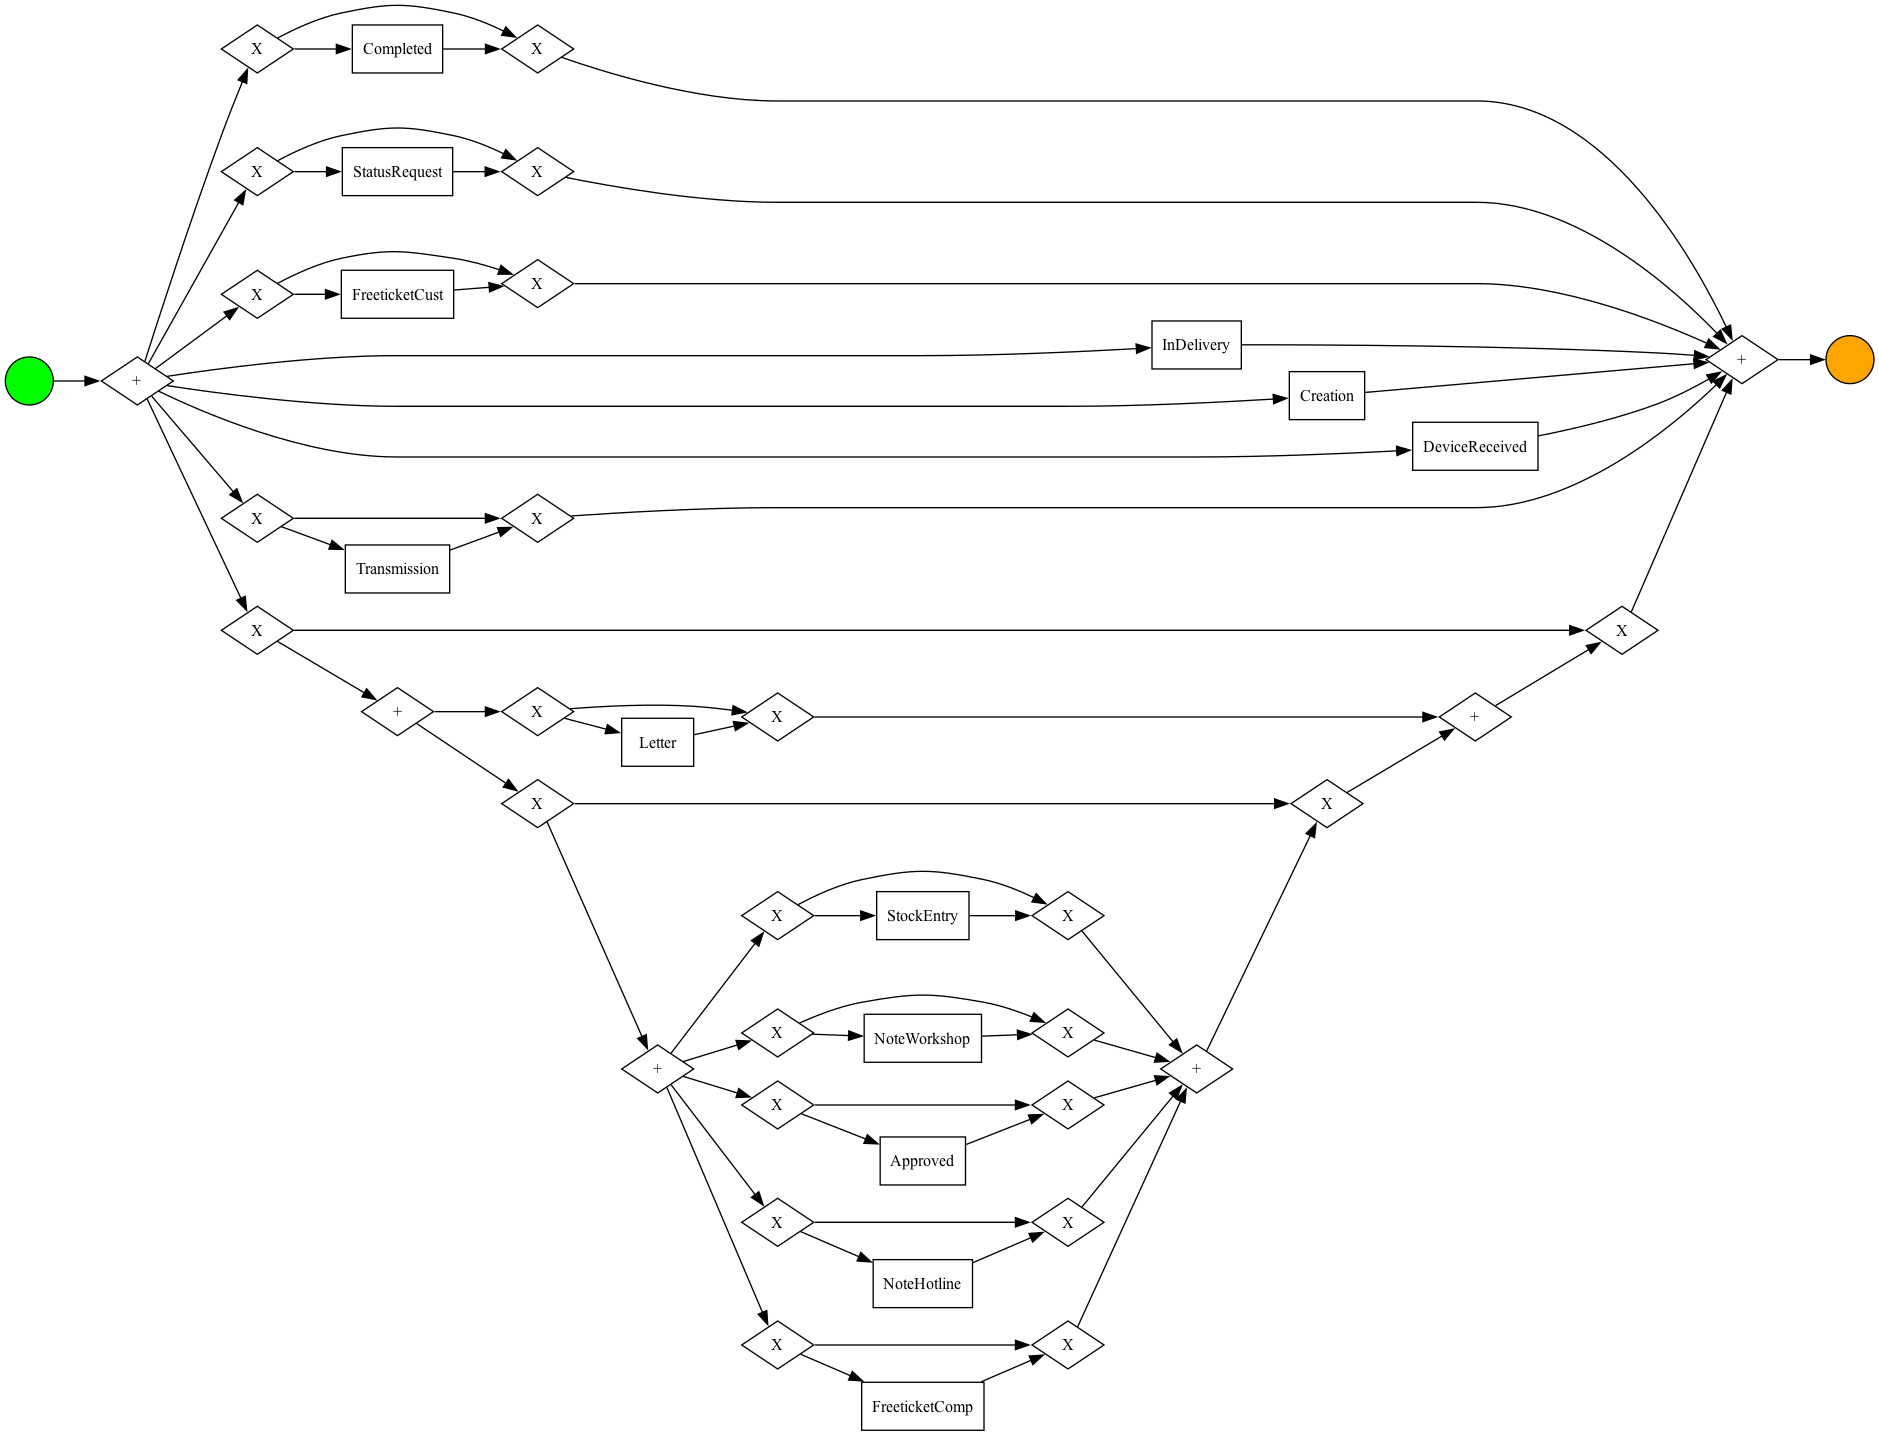

In [12]:
bpmn_graph = pm4py.discover_bpmn_inductive(dataframe, activity_key='concept:name', case_id_key='case:concept:name', timestamp_key='time:timestamp')
pm4py.view_bpmn(bpmn_graph)

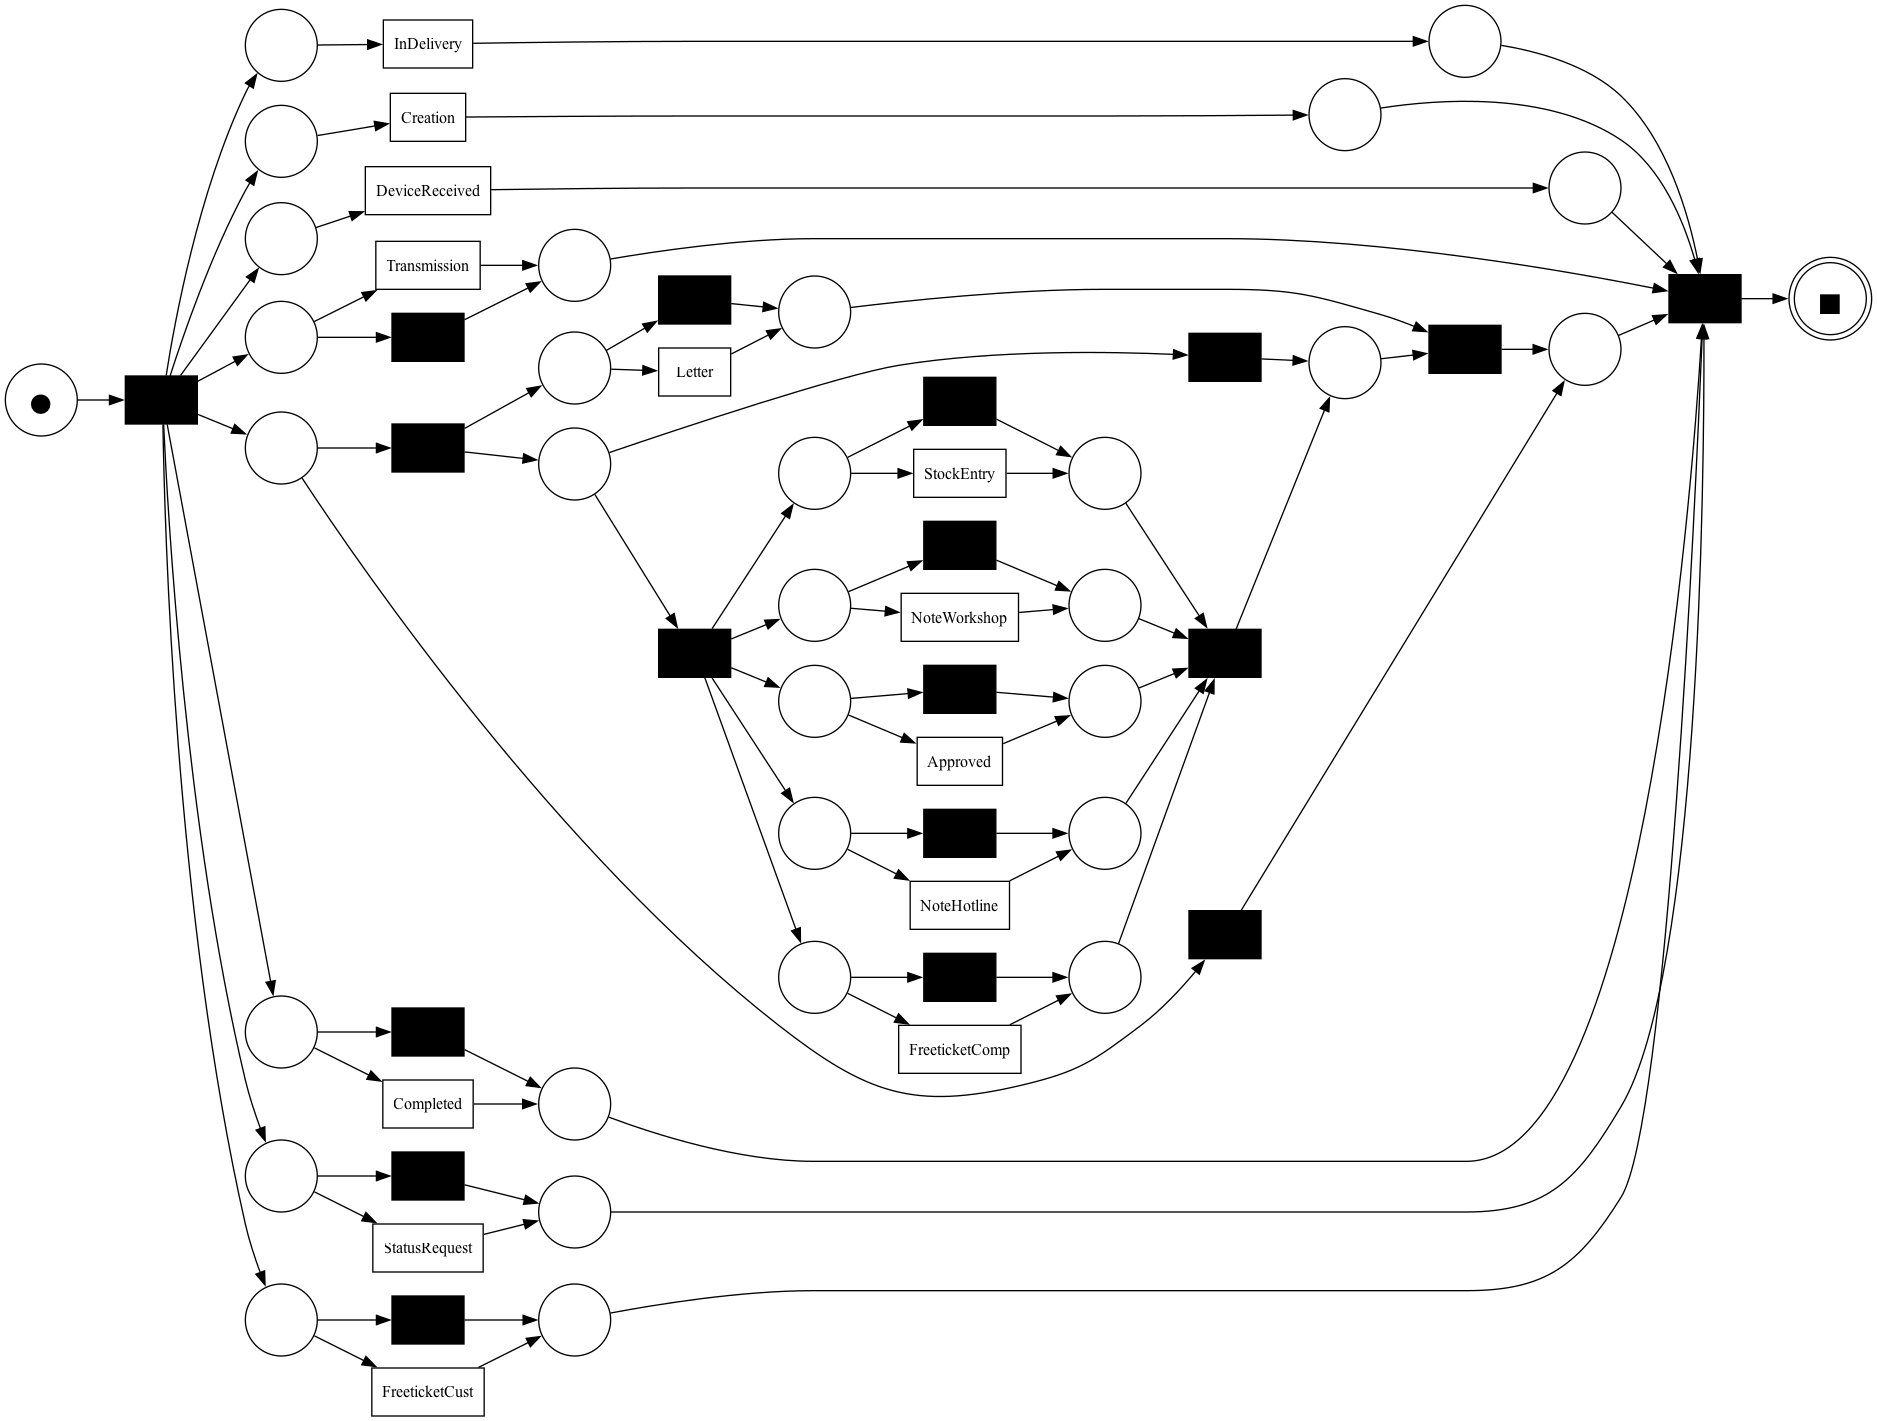

In [13]:
net, initial_marking, final_marking = pm4py.discover_petri_net_inductive(event_log)
pm4py.view_petri_net(net, initial_marking, final_marking, format="png")

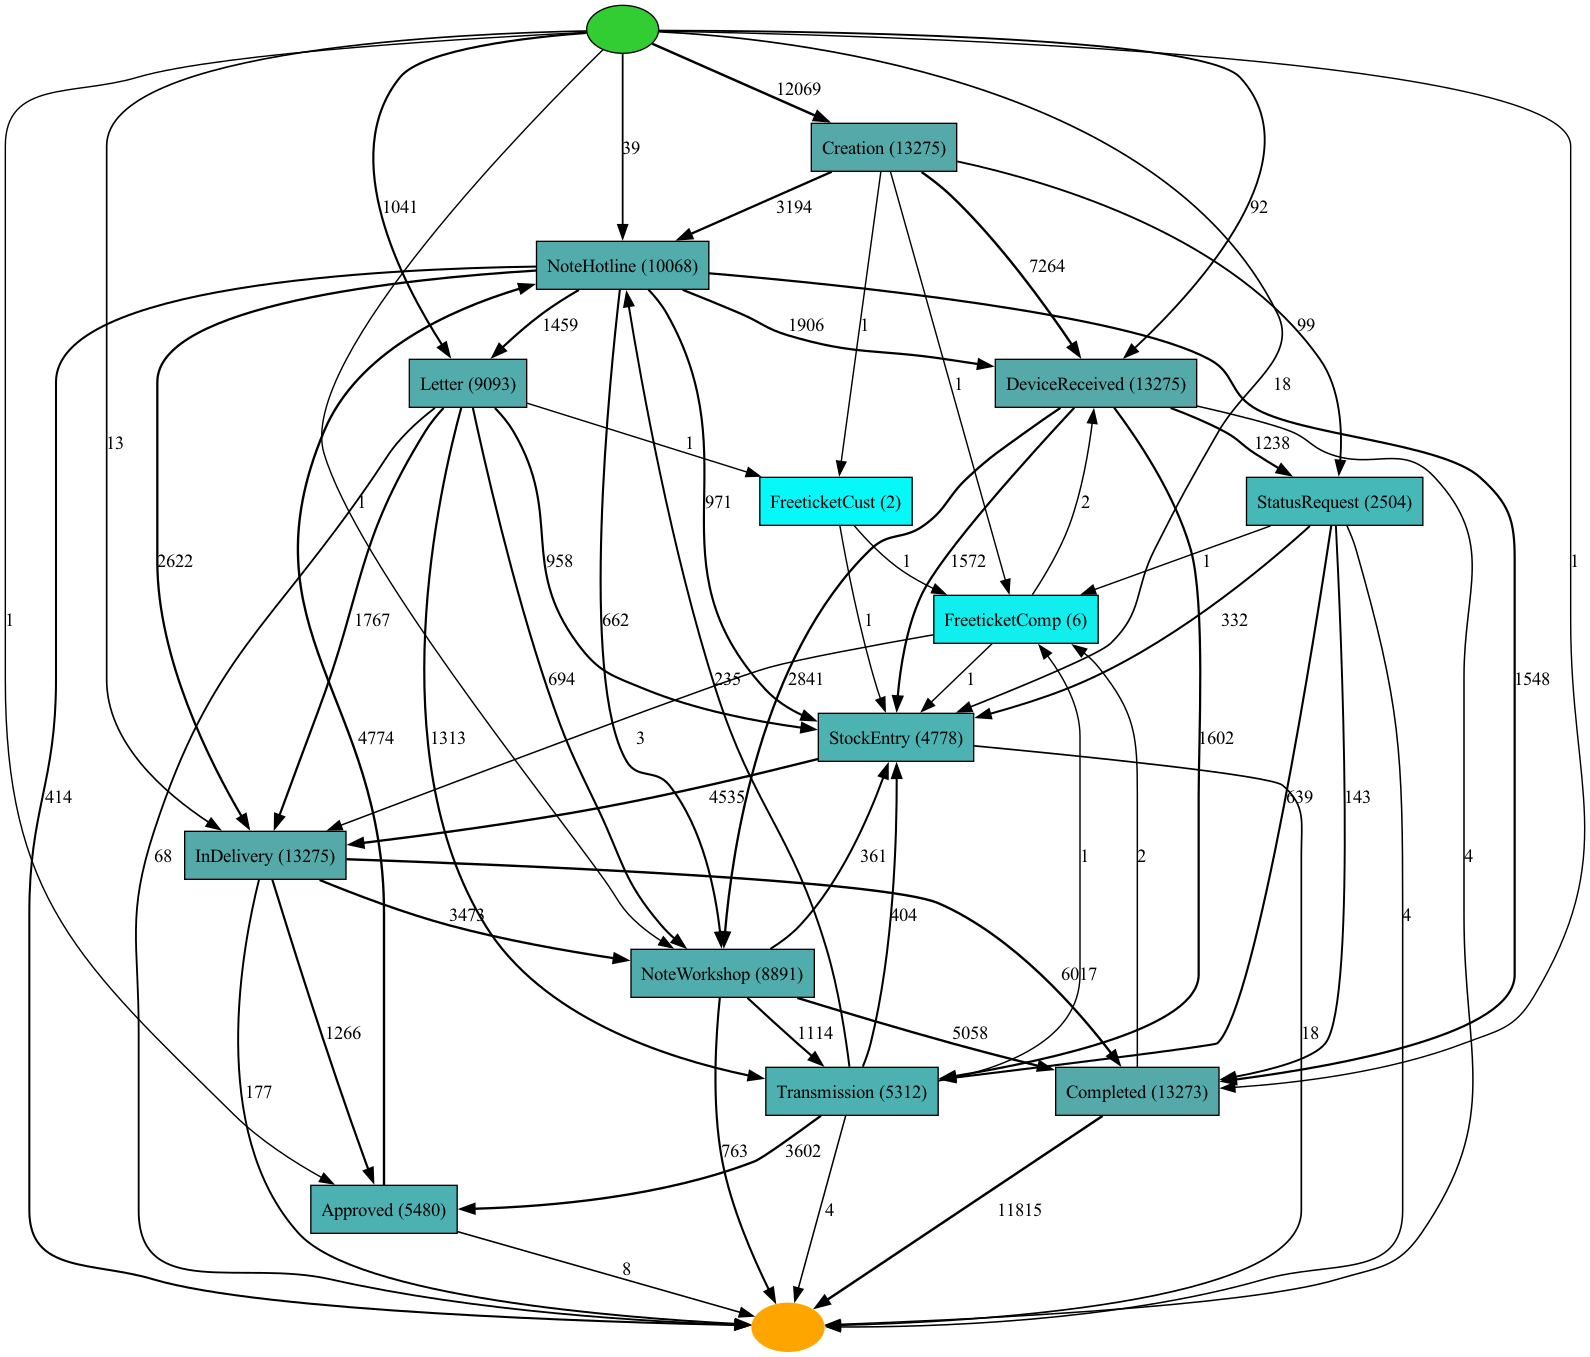

In [14]:
map = pm4py.discover_heuristics_net(event_log)
pm4py.view_heuristics_net(map)

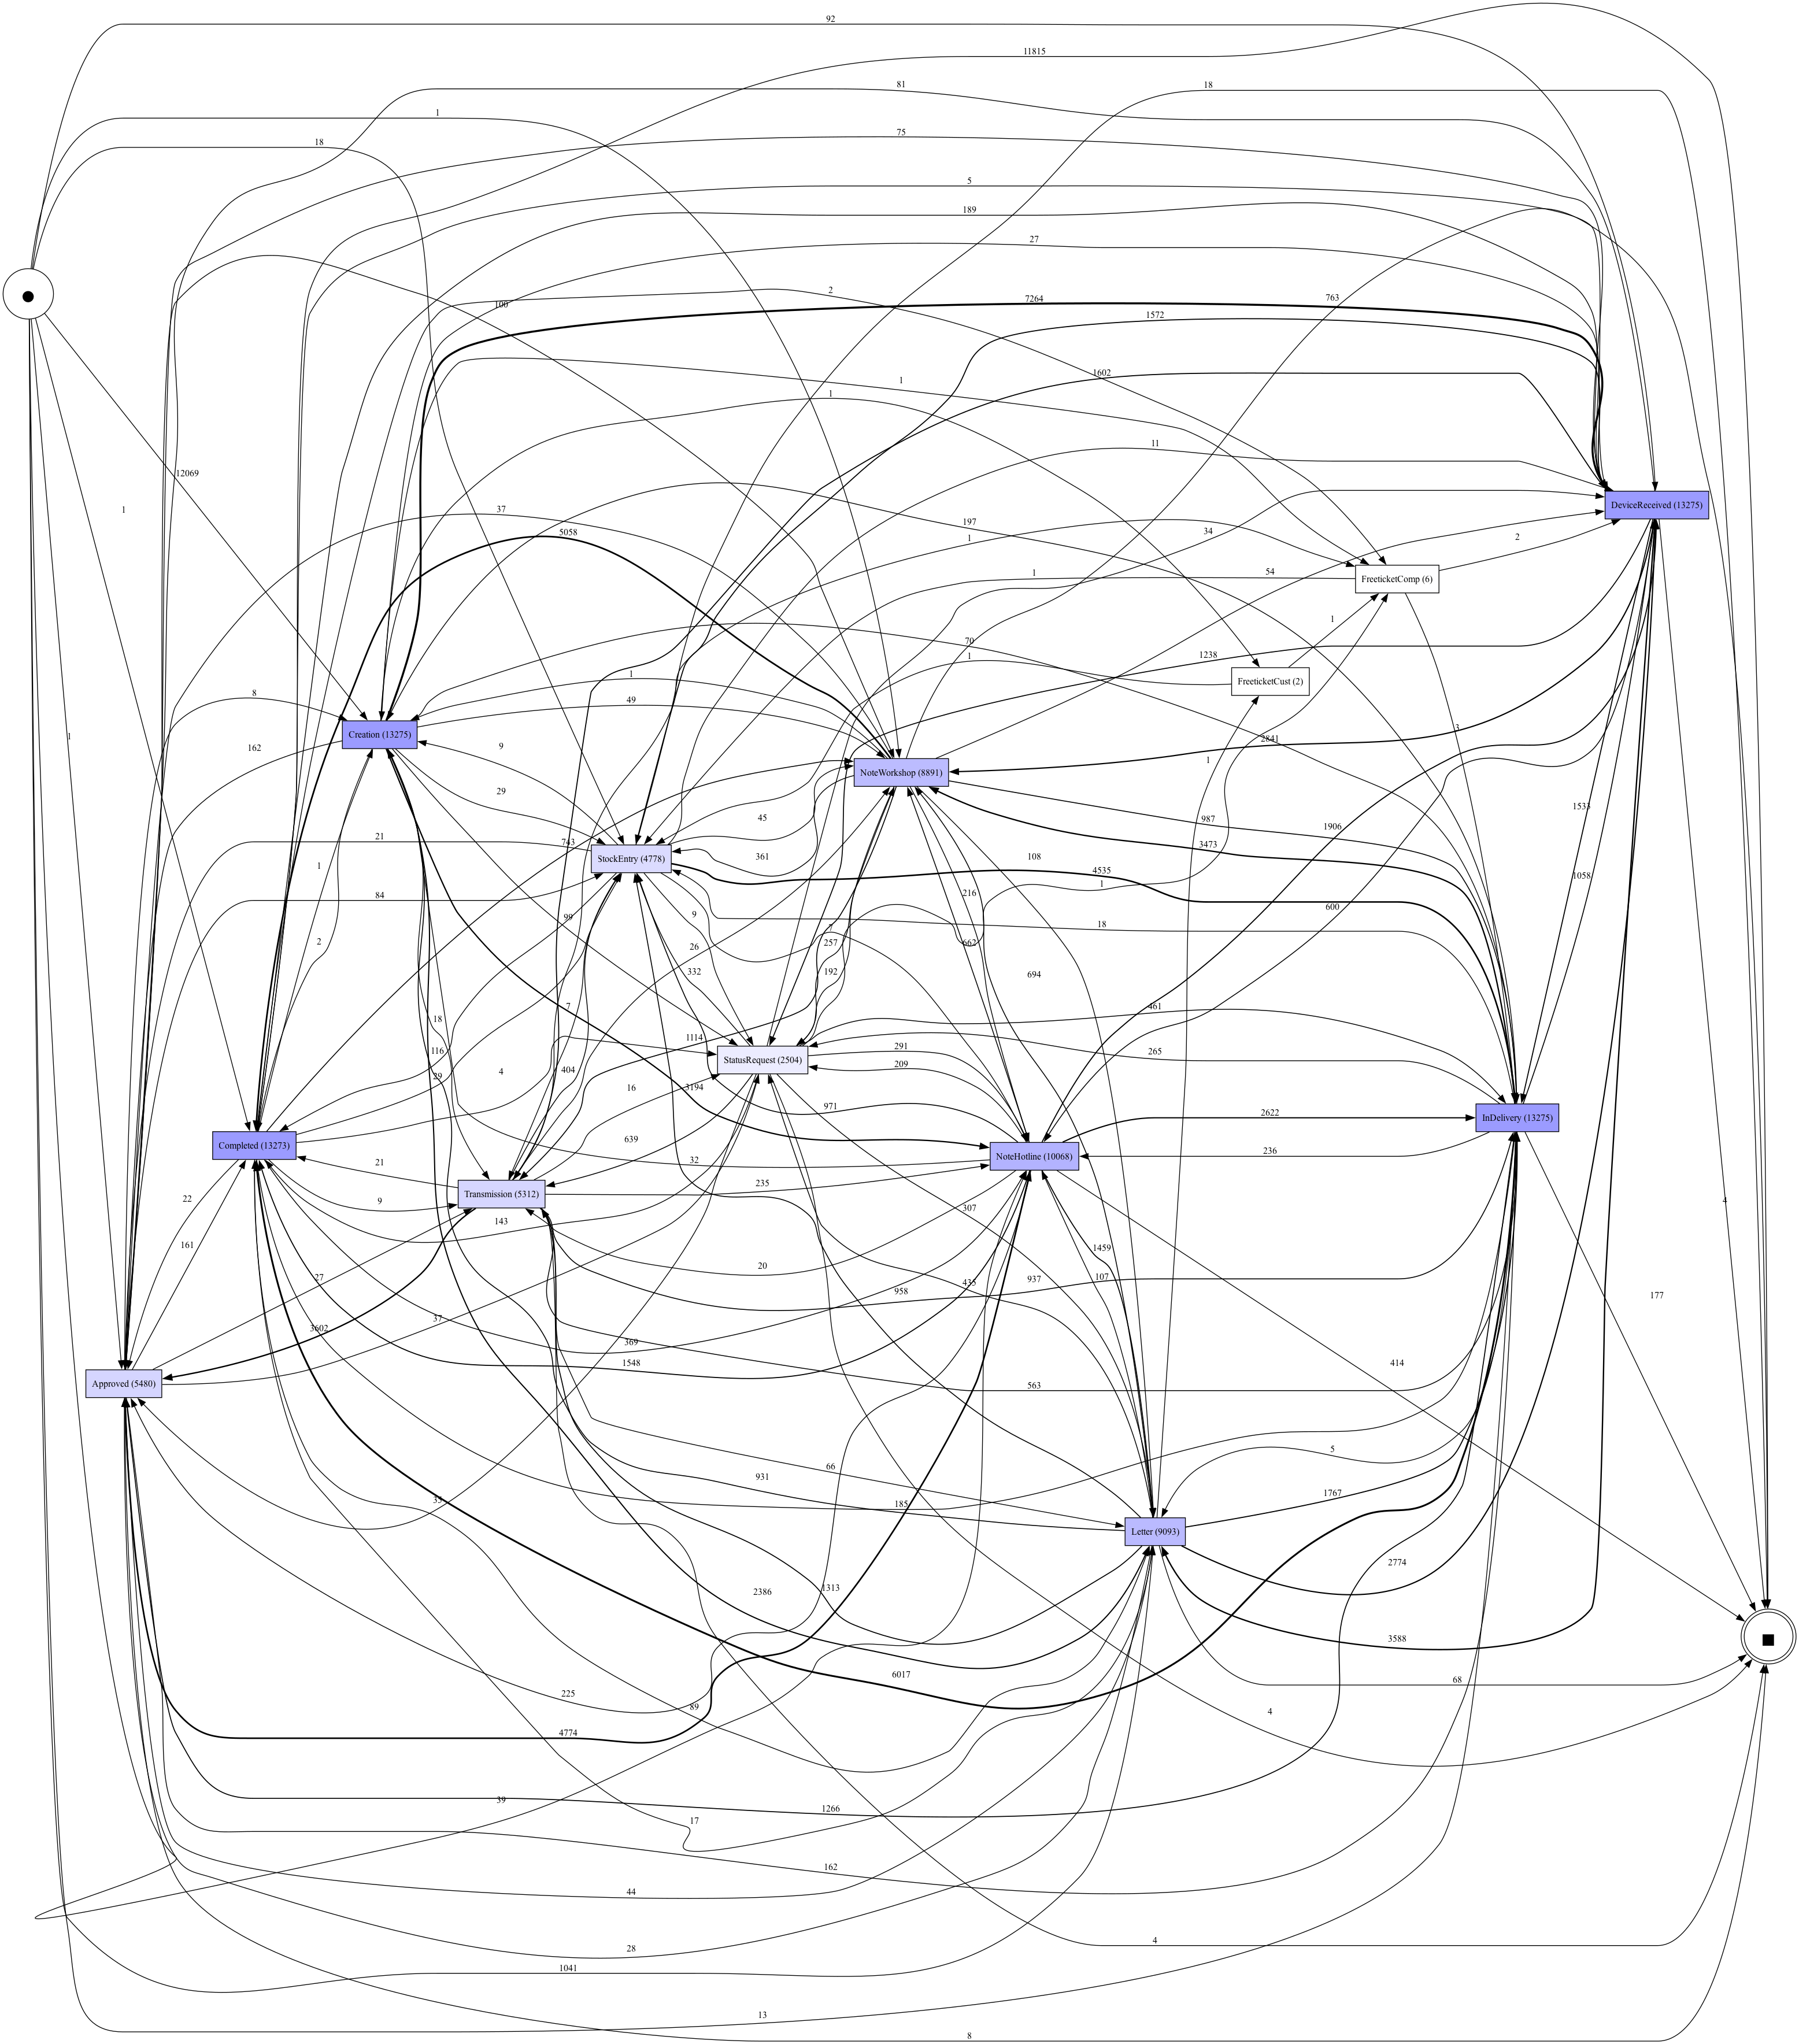

In [15]:
dfg, start_activities, end_activities = pm4py.discover_dfg(dataframe, case_id_key='case:concept:name', activity_key='concept:name', timestamp_key='time:timestamp')
pm4py.view_dfg(dfg, start_activities, end_activities, format='png')

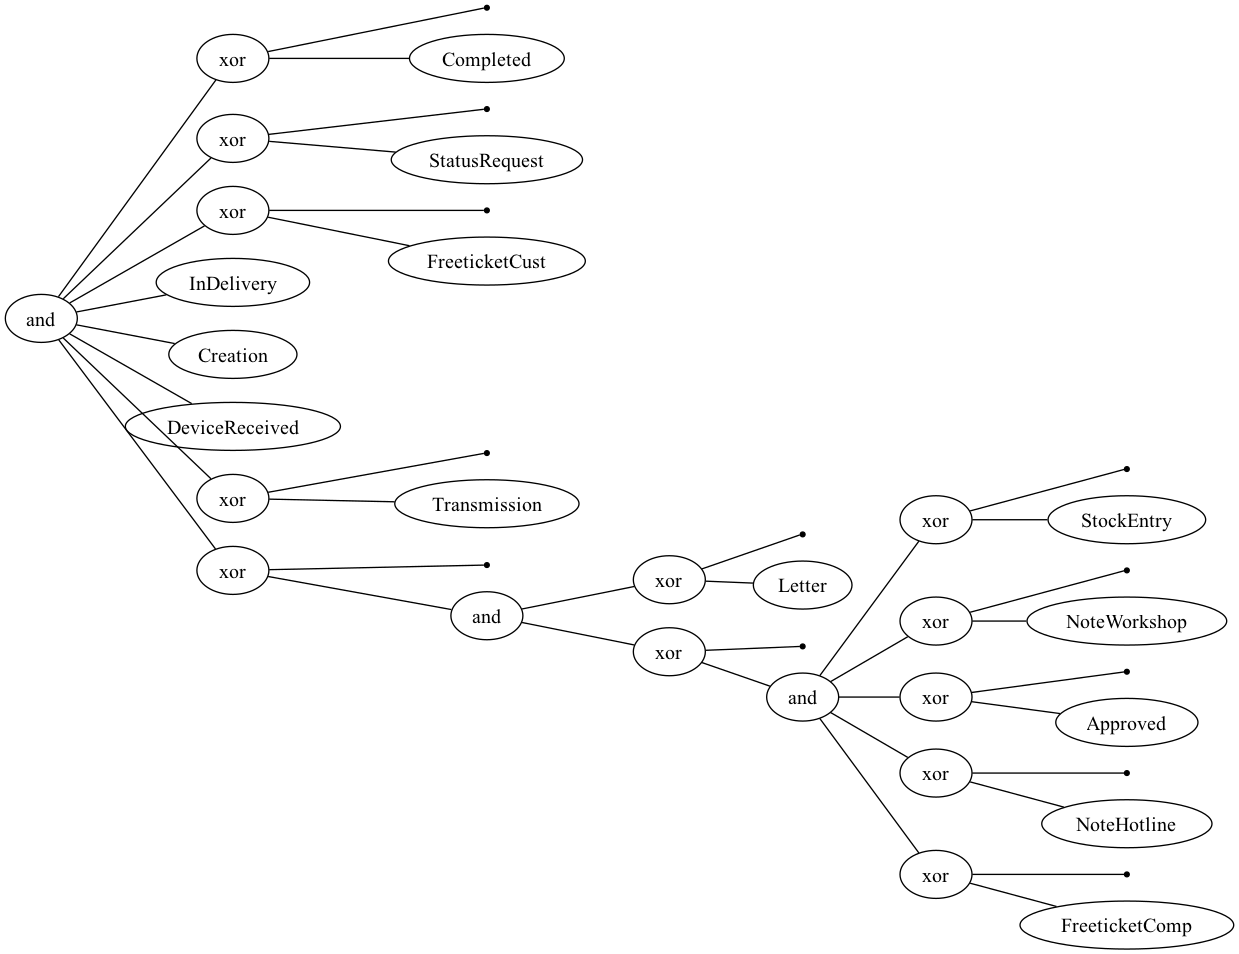

In [16]:
process_tree = pm4py.discover_process_tree_inductive(dataframe, activity_key='concept:name', case_id_key='case:concept:name', timestamp_key='time:timestamp')
pm4py.view_process_tree(process_tree, format='png')

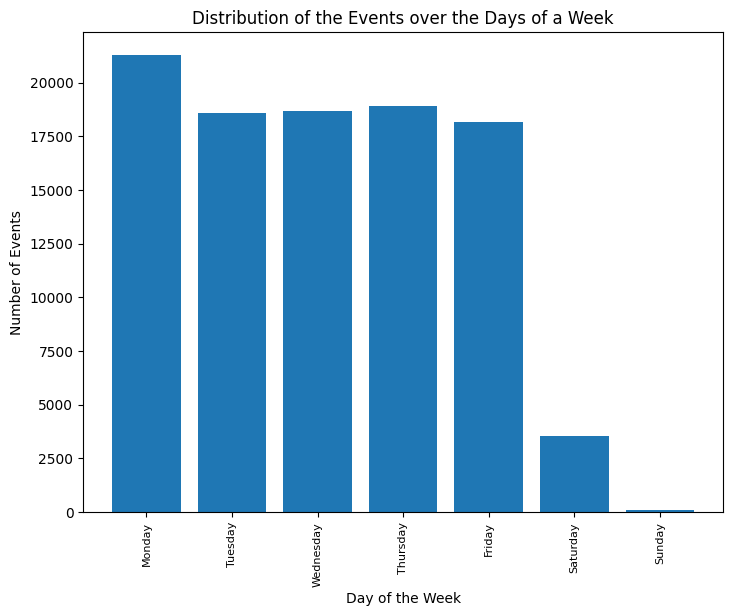

In [17]:
pm4py.view_events_distribution_graph(dataframe, format='png', distr_type='days_week', activity_key='concept:name', case_id_key='case:concept:name', timestamp_key='time:timestamp')